In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from tensorflow import set_random_seed

#keras package
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.grid_search import GridSearchCV 
from keras import regularizers
from random import choice
import pydot
import graphviz
from IPython.display import SVG
import keras.backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
np.random.seed(42)



## 1.读取-划分数据

In [4]:
def importdata():
    path = r"C:\Users\hasee\workspace\workspace\tomo\data2.txt"
    df = pd.read_table(path)
    columns = df.columns
    #print(columns)

    dfdata = df[['latgpsutm', 'lnggpsutm', 'lnglacutm', 'latlacutm']]
    #print(len(dfdata))
    dfdata = dfdata.drop_duplicates()#删去重复项
    #print(len(dfdata))
    return dfdata

df = importdata()

随机70%训练集切分-方法1：

In [5]:
df1 = shuffle(df)
df1 = df.set_index([list(range(len(df1)))])
index = int(len(df1)*0.7)
df1_train=df1[:index]
df1_test=df1[index:]

随机70%训练集切分-方法2：

In [138]:
df_train=df.sample(frac=0.7)
df_train=df_train.reset_index(drop=True)

In [139]:
df_train.isnull().values.any()

False

In [140]:
list(df_train)

['latgpsutm', 'lnggpsutm', 'lnglacutm', 'latlacutm']

In [63]:
X_train=df1[['lnglacutm', 'latlacutm']]
#y_train=df1[['latgpsutm', 'lnggpsutm']]
y_train=df1[['lnggpsutm','latgpsutm']]

In [115]:
df_test=df.sample(frac=1)
df_test=df_test.reset_index(drop=True)

In [126]:
X_test1=df_test[['lnglacutm', 'latlacutm']].loc[:10].as_matrix()
y_test1=df_test[['lnggpsutm','latgpsutm']].loc[:10].as_matrix()

In [127]:
X_test1

array([[  353051.8908,  3456714.9799],
       [  357792.4708,  3461767.1107],
       [  355978.7301,  3455788.7757],
       [  351689.8564,  3453545.1848],
       [  357042.4242,  3462628.9091],
       [  351521.238 ,  3454447.9662],
       [  352994.7286,  3454480.9138],
       [  357792.4708,  3461767.1107],
       [  352858.5828,  3456276.6316],
       [  356427.1632,  3462068.381 ],
       [  355441.9869,  3459466.9501]])

In [128]:
y_test1

array([[  353155.1905,  3456075.024 ],
       [  358011.328 ,  3461881.5669],
       [  355823.7554,  3456086.2942],
       [  351463.3832,  3453354.8419],
       [  356951.2752,  3462465.3738],
       [  351384.9448,  3454387.7827],
       [  352943.864 ,  3454503.1871],
       [  357967.8463,  3461729.0467],
       [  352850.0212,  3456264.661 ],
       [  356926.8315,  3461819.2404],
       [  355900.4341,  3459670.8864]])

In [66]:
val_1=df1.loc[10:20]
val_1

,latgpsutm,lnggpsutm,lnglacutm,latlacutm
10,3.462141e+06,357312.1664,356965.6919,3.462668e+06
11,3.462141e+06,357312.1664,357405.7554,3.461803e+06
12,3.462425e+06,357110.5482,357405.7554,3.461803e+06
13,3.462212e+06,357045.4753,356788.6773,3.462205e+06
14,3.462329e+06,356804.1912,356915.2664,3.462539e+06
15,3.462329e+06,356804.1912,356698.2993,3.462768e+06
16,3.462617e+06,356729.9513,356698.2993,3.462768e+06
17,3.462329e+06,356804.1912,356608.2450,3.462769e+06
18,3.462617e+06,356729.9513,356915.2664,3.462539e+06
19,3.462425e+06,357110.5482,356965.6919,3.462668e+06


# Build the model

In [6]:
def NN_model(optimizer='adam',hidden_units=100,dropout_rate=0.3,L2_rate=.001):
    model=Sequential()#设置为Sequential模型
    #添加第一层hidden layer
    model.add(Dense(hidden_units,activation='relu',input_dim=2,kernel_regularizer=regularizers.l2(L2_rate)))
    #添加dropout（正则化，减少overfit）
    model.add(Dropout(dropout_rate))
    #添加输出层
    model.add(Dense(2,activation='relu',kernel_regularizer=regularizers.l2(L2_rate)))
    #编译
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model

In [7]:
#kfold=StratifiedKFold(n_splits=5,random_state=42)
#nn_reg=KerasRegressor(build_fn=NN_model,nb_epoch=40,batch_size=50,verbose=-1)
#nn_reg.fit(X_train,y_train)
nn_model=NN_model()

In [143]:
nn_model.fit(X_train.as_matrix(),y_train.as_matrix(),epochs=100,validation_split=0.2,batch_size=50,verbose=-1)#callbacks='early_stop')

Train on 1276 samples, validate on 320 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100


In [144]:
nn_model.evaluate(X_train.as_matrix(),y_train.as_matrix())

1596/1596 [==============================] - 0s 9us/step


1362093959.0576441

In [145]:
test_X=df1_test[['lnglacutm', 'latlacutm']].iloc[0:2].as_matrix()
test_y=df1_test[['lnggpsutm','latgpsutm']].iloc[0:2].as_matrix()

In [146]:
nn_model.predict(test_X)

array([[  355278.875,  3410743.25 ],
       [  355278.875,  3410743.25 ]], dtype=float32)

In [147]:
test_y

array([[  357200.1846,  3462168.7389],
       [  357217.0202,  3462169.8034]])

# 2. added the call backs

In [148]:
filepath="./final_model.h5py"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=-1, save_best_only=True, mode='min')
earlystop= EarlyStopping(monitor='val_loss', patience=10, mode='min') 
nn_model.fit(X_train.as_matrix(),y_train.as_matrix(),epochs=100,\
             validation_split=0.2,batch_size=50,verbose=-1,callbacks=[earlystop,checkpoint])

Train on 1276 samples, validate on 320 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100


# 3. Cross_Validation tuning the parameter

In [9]:
MAX_EPOCH=100#最大epoch，实际应用early_stop
n_iteration=20#迭代20次
best_score=0#初始化最佳loss分数
#设置验证集（cv=5）
val_set_1=df1.loc[:318]
val_set_2=df1.loc[319:2*319-1]
val_set_3=df1.loc[2*319:3*319-1]
val_set_4=df1.loc[3*319:4*319-1]
val_set_5=df1.loc[4*319:]
iteration=0
for drop_rate in [0.18,0.19,0.2,0.21,0.22,0.23]:
    for hiden_units in range(120,133,2):
        optimizer = 'Adamax' 
        L2 = 0.003 
        loss_set=[]
        fold_num=0
        
        iteration+=1
    #kfold=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    #for i ,(train_index,val_index) in enumerate(kfold.split(X_train,y_train)):
        for val_set in [val_set_1,val_set_2,val_set_3,val_set_4,val_set_5]:
            fold_num+=1
            train_x=df1.drop(val_set.index)[['lnglacutm', 'latlacutm']]
            train_y=df1.drop(val_set.index)[['lnggpsutm','latgpsutm']]
            val_x,val_y=val_set[['lnglacutm', 'latlacutm']],val_set[['lnggpsutm','latgpsutm']]
            print("Fold ",fold_num," Start")
        #带入参数
            nn_model=NN_model(hidden_units=hiden_units,\
                          optimizer=optimizer,\
                          dropout_rate=drop_rate,\
                          L2_rate=L2
                         )
        #输出模型
            filepath="./model_"+str(iteration)+"_and_"+str(fold_num)+".h5py"
            checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=-1, save_best_only=True, mode='min')
        #设置early_stop
            earlystop= EarlyStopping(monitor='val_loss', patience=10, mode='min') 
            nn_model.fit(train_x.as_matrix(),train_y.as_matrix(),epochs=MAX_EPOCH,validation_split=0.2,\
                  batch_size=50,verbose=-1,callbacks=[earlystop,checkpoint])
            loss=nn_model.evaluate(val_x.as_matrix(),val_y.as_matrix())
            loss_set.append(loss)
            print("%dFold's loss value is %f"%(fold_num,loss))
    #平均5个fold的loss值，得到这个参数下得loss分数
        loss_score=np.mean(loss_set)
        print("%d iteration's loss value is %f"%(iteration,loss_score))
        print("%d iteration has the parameter :"%(iteration))
        print("the hidden unit is ",hiden_units,'dropout rate is ',drop_rate)
        if iteration == 1:
            best_score=loss_score
    #如果loss分数小于最好分数，这个loss分数是新的最佳loss分数
        if loss_score < best_score:
            best_score=loss_score
            print("%d iteration has best score %f"%(iteration,best_score))

    
  
        
        
                

Fold  1  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 160652889.228840
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 370923892.363636
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/1

Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 863354841.880878
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 359260556.338558
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100

Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 73412698.909091
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
319/319 [==============================] - ETA: 0s
2Fold's loss value

Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 585683492.313480
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 46438627.937304
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch

Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 148942019.862069
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
319/319 [==============================] - ETA: 0s
3Fold's loss value is 342949075.761755
Fold  4  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100


Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 63485918.244514
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
319/319 [==============================] - ETA: 0s
3Fold's loss value is 97451585

Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 83788762.482759
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 318528383.799373
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100


Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 116420516.163009
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 51760798.570533
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch

Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
320/320 [==============================] - ETA: 0s
5Fold's loss value is 466302505.600000
24 iteration's loss value is 513067195.841003
24 iteration has the parameter :
the hidden unit is  124 dropout rate is  0.21
Fold  1  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 134971016.326019
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Ep

Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 604398005.567398
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 680123974.620690
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Ep

Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 173109889.554859
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 1031676997.818182
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
319/319 [============================

Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 619218334.495298
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 364623209.630094
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
319/319 [================

Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 424904915.661442
Fold  3  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
319/319 [==============================] - ETA: 0s
3Fold's loss value is 74787382.068966
Fold  4  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 1

Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
319/319 [==============================] - ETA: 0s
1Fold's loss value is 539462615.272727
Fold  2  Start
Train on 1021 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
319/319 [==============================] - ETA: 0s
2Fold's loss value is 749409057.905956
Fold  3  Start

Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
319/319 [==============================] - ETA: 0s
4Fold's loss value is 52796910.846395
Fold  5  Start
Train on 1020 samples, validate on 256 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
320/320 [==============================] - ETA: 0s
5Fold's loss value is 272107556.800000
42 iteration's loss value is 315253574.803260
42 iteration has the parameter :
the hidden unit is  132 dropout rate is  0.23


In [10]:
y_test1

NameError: name 'y_test1' is not defined

In [131]:
X_test1

array([[  353051.8908,  3456714.9799],
       [  357792.4708,  3461767.1107],
       [  355978.7301,  3455788.7757],
       [  351689.8564,  3453545.1848],
       [  357042.4242,  3462628.9091],
       [  351521.238 ,  3454447.9662],
       [  352994.7286,  3454480.9138],
       [  357792.4708,  3461767.1107],
       [  352858.5828,  3456276.6316],
       [  356427.1632,  3462068.381 ],
       [  355441.9869,  3459466.9501]])

In [132]:
pre_X

array([[  356153.03125,  3420512.5    ],
       [  356728.9375 ,  3428977.5    ],
       [  356097.25   ,  3422075.     ],
       [  355812.875  ,  3416524.25   ],
       [  356806.8125 ,  3429143.     ],
       [  355902.46875,  3417204.     ],
       [  355925.125  ,  3418442.5    ],
       [  356728.9375 ,  3428977.5    ],
       [  356106.     ,  3419957.     ],
       [  356741.71875,  3428130.5    ],
       [  356464.21875,  3424966.     ]], dtype=float32)

In [133]:
pre_X-y_test1

array([[  2997.84075, -35562.524  ],
       [ -1282.3905 , -32904.0669 ],
       [   273.4946 , -34011.2942 ],
       [  4349.4918 , -36830.5919 ],
       [  -144.4627 , -33322.3738 ],
       [  4517.52395, -37183.7827 ],
       [  2981.261  , -36060.6871 ],
       [ -1238.9088 , -32751.5467 ],
       [  3255.9788 , -36307.661  ],
       [  -185.11275, -33688.7404 ],
       [   563.78465, -34704.8864 ]])

In [134]:
X_test1-y_test1

array([[-103.2997,  639.9559],
       [-218.8572, -114.4562],
       [ 154.9747, -297.5185],
       [ 226.4732,  190.3429],
       [  91.149 ,  163.5353],
       [ 136.2932,   60.1835],
       [  50.8646,  -22.2733],
       [-175.3755,   38.064 ],
       [   8.5616,   11.9706],
       [-499.6683,  249.1406],
       [-458.4472, -203.9363]])

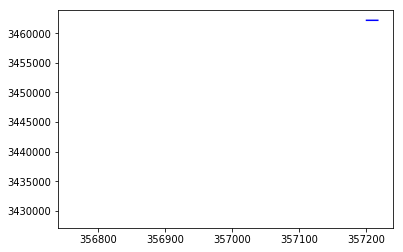